# Quick view musicians movements
Concert 1, slow ACC



In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import heartpy as hp

from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

In [2]:
%load_ext autoreload
%autoreload 1
%aimport qex

In [14]:
Show_folder = {
    'C1':'../Data/AlignedEQ/20230216_C1/Pieces/Stra/',
    'C5':'../Data/AlignedEQ/20230218_C5/Pieces/Stra/'}

sigs =['EQBACC','EQCIBI','EQDATA','EQRESP']

In [11]:
Piece_timings = pd.read_csv('./Timing/ctimes.csv')
Piece_timings.iloc[[31,32],:] 
# use Strauss excerpt across pieces to demonstrate alignment quality across conditions
# 1. close to alignment point or far, 
# 2. recording specific estimate of drift or device median

,Event,RD,C1,C2,C3,C4,C5
31,Strauss,3188.606,3628.738,138.478,84.507,3373.438,3441.964
32,Applause for Strauss,3334.334,3749.508,259.002,209.167,3493.683,3564.004


In [15]:
player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104','VN205','VN203','VN202','VN206','VN209','VN210','VN207','VN208','VN201','VN204','VA305','VA307','VA308','VA301','VA306','VA302','VA303','VA304','LS406','LS407','LS408','LS405','LS401','LS403','LS402','LS410','LS404','WW505','WW502','WW503','WW506','WW501','WW504','WW507','BR604','BR603','BR602','BR606','BR607','BR605','BR601','PC704','PC705','PC703','PC701','PC702','PC707']
len(player_order)

55

In [66]:
Performances = {}
piece_name = 'Stra'
datafile_type = 'EQBACC'
sigName = 'QoM'
# player_order
for concert in Show_folder.keys():
    print(concert)
    data_loc = Show_folder[concert]+datafile_type+'/'
    files = os.listdir(data_loc)
    files.sort()
    sig_files = {}
    for f in files: 
        if f.endswith(datafile_type+'.csv'): 
            partID = f.split('_')[2]
            sig_files[partID] = data_loc+f
            
    sf = 25 # hz 
    s_time = -5 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
    e_time =  130 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
    dur = e_time - s_time
    time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
    df_seg = pd.DataFrame(index = time_s, columns = player_order)
    
    df_sig = pd.DataFrame(index = time_s,columns = player_order,dtype='float') # Piece_timings.loc[2,ev]
    # ACC
    for partID in sig_files.keys(): #['c_sTime']
        V = pd.read_csv(sig_files[partID])
        sig_t = V['p_sTime']
        if sigName == 'QoM':
            sig_v = np.sqrt(np.square(V.loc[:,[ 'Vert Accelerometer','Lat Accelerometer','Long Accelerometer']].diff()).sum(axis=1))
        else:
            if sigName in V.columns:
                sig_v = V[sigName].values

        f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
        new_sig = f(time_s)
        df_sig.loc[:,partID] = new_sig
        
    Performances[concert] = df_sig.copy()

C1
C5


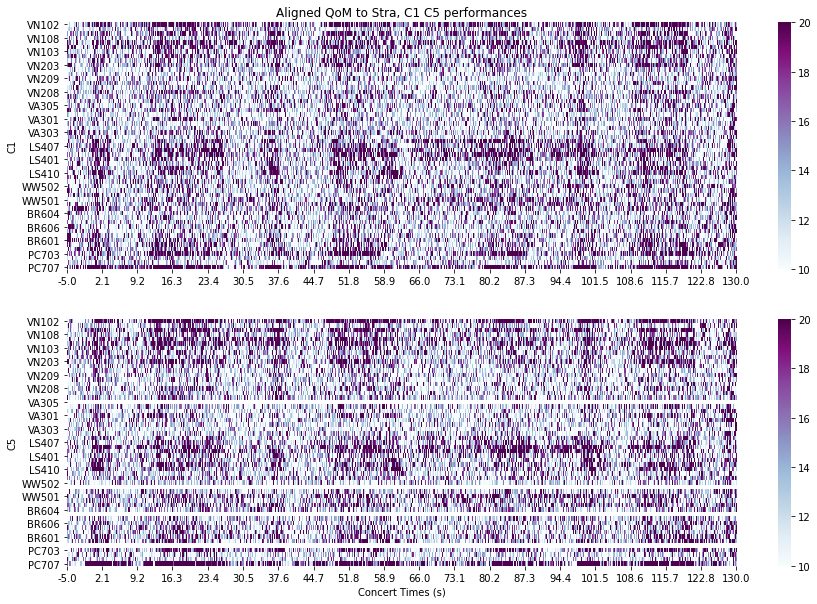

In [68]:
concerts = list(Performances.keys())
fig, (ax) = plt.subplots(len(concerts), 1,figsize = [15,10])
for i in range(len(concerts)):
    concert = concerts[i]
    df_sig = Performances[concert].copy()
    times = df_sig.index
    num_ticks = 20
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]

    chart = sns.heatmap(data=df_sig.transpose(), ax=ax[i],vmin=10, vmax=20,cmap="BuPu")
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels,rotation = 0)
    ax[i].set_ylabel(concert)
    if i == 0:
        ax[i].set_title('Aligned ' +  sigName + ' to ' + piece_name + ', C1 C5 performances')

ax[i].set_xlabel('Concert Times (s)')
plt.savefig('./plots/2_performances_'+ piece_name+ '_set_'+sigName+'.png',dpi = 300)
plt.show()


In [69]:
Performances = {}
piece_name = 'Stra'
datafile_type = 'EQRESP'
sigName = 'Breathing'
sf = 20 # hz 
# player_order
for concert in Show_folder.keys():
    print(concert)
    data_loc = Show_folder[concert]+datafile_type+'/'
    files = os.listdir(data_loc)
    files.sort()
    sig_files = {}
    for f in files: 
        if f.endswith(datafile_type+'.csv'): 
            partID = f.split('_')[2]
            sig_files[partID] = data_loc+f
            
    
    s_time = -5 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
    e_time =  130 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
    dur = e_time - s_time
    time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
    df_seg = pd.DataFrame(index = time_s, columns = player_order)
    
    df_sig = pd.DataFrame(index = time_s,columns = player_order,dtype='float') # Piece_timings.loc[2,ev]
    # ACC
    for partID in sig_files.keys(): #['c_sTime']
        V = pd.read_csv(sig_files[partID])
        sig_t = V['p_sTime']
        if sigName == 'QoM':
            sig_v = np.sqrt(np.square(V.loc[:,[ 'Vert Accelerometer','Lat Accelerometer','Long Accelerometer']].diff()).sum(axis=1))
        else:
            if sigName in V.columns:
                sig_v = V[sigName].values

        f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
        new_sig = f(time_s)
        df_sig.loc[:,partID] = new_sig
        
    Performances[concert] = df_sig.diff().copy()

C1
C5


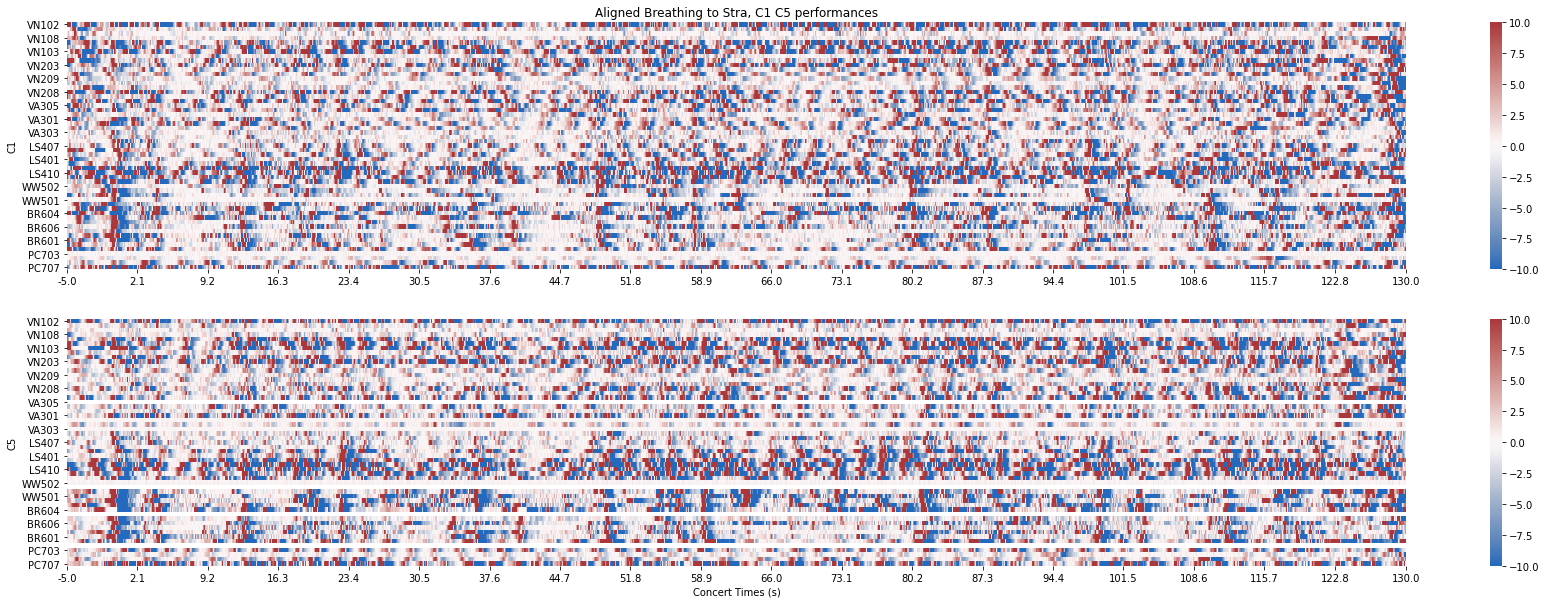

In [70]:
concerts = list(Performances.keys())
fig, (ax) = plt.subplots(len(concerts), 1,figsize = [30,10])
for i in range(len(concerts)):
    concert = concerts[i]
    df_sig = Performances[concert].copy()
    times = df_sig.index
    num_ticks = 20
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]

    chart = sns.heatmap(data=df_sig.transpose(),vmin=-10, vmax=10, ax=ax[i],cmap="vlag")
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels,rotation = 0)
    ax[i].set_ylabel(concert)
    if i == 0:
        ax[i].set_title('Aligned ' +  sigName + ' to ' + piece_name + ', C1 C5 performances')

ax[i].set_xlabel('Concert Times (s)')
plt.savefig('./plots/2_performances_'+ piece_name+ '_set_'+sigName+'.png',dpi = 300)
plt.show()


In [64]:
Performances = {}
piece_name = 'Stra'
datafile_type = 'EQCIBI'
sigName = 'Interbeat Interval (MS)'
sf = 20 # hz 
# player_order
for concert in Show_folder.keys():
    print(concert)
    data_loc = Show_folder[concert]+datafile_type+'/'
    files = os.listdir(data_loc)
    files.sort()
    sig_files = {}
    for f in files: 
        if f.endswith(datafile_type+'.csv'): 
            partID = f.split('_')[2]
            sig_files[partID] = data_loc+f
            
    
    s_time = -5 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
    e_time =  130 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
    dur = e_time - s_time
    time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
    df_seg = pd.DataFrame(index = time_s, columns = player_order)
    
    df_sig = pd.DataFrame(index = time_s,columns = player_order,dtype='float') # Piece_timings.loc[2,ev]
    # ACC
    for partID in sig_files.keys(): #['c_sTime']
        V = pd.read_csv(sig_files[partID])
        sig_t = V['p_sTime']
        sig_v = V[sigName].diff().values

        f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
        new_sig = f(time_s)
        df_sig.loc[:,partID] = new_sig
        
    Performances[concert] = df_sig.copy()

C1
C5


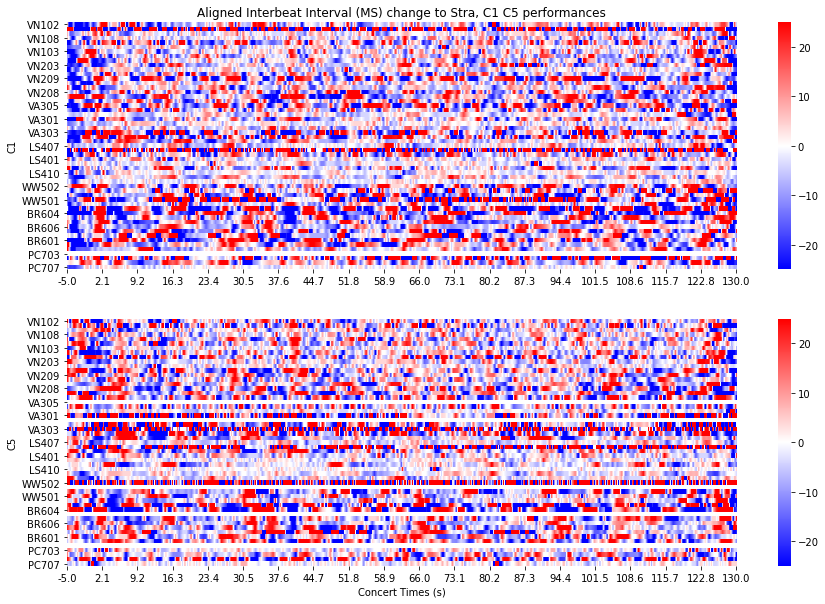

In [65]:
concerts = list(Performances.keys())
fig, (ax) = plt.subplots(len(concerts), 1,figsize = [15,10])
for i in range(len(concerts)):
    concert = concerts[i]
    df_sig = Performances[concert].copy()
    times = df_sig.index
    num_ticks = 20
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]

    chart = sns.heatmap(data=df_sig.transpose(),vmin=-25, vmax=25, ax=ax[i],cmap="bwr")#
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels,rotation = 0)
    ax[i].set_ylabel(concert)
    if i == 0:
        ax[i].set_title('Aligned ' +  sigName + ' change to ' + piece_name + ', C1 C5 performances')

ax[i].set_xlabel('Concert Times (s)')
plt.savefig('./plots/2_performances_'+ piece_name+ '_set_'+sigName+'.png',dpi = 300)
plt.show()


In [80]:
axShow_folder = {
    'C1':'../Data/AlignedAX3/20230216_C1/Pieces/Stra/',
    'C5':'../Data/AlignedAX3/20230218_C5/Pieces/Stra/'}
ax_player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104',
                   'LS406','LS407','LS408','LS405','LS401']

Performances = {}
piece_name = 'Stra'
datafile_type = 'AX3ACC'
sigName = 'QoM'
sf = 50 # hz 
# player_order
for concert in axShow_folder.keys():
    print(concert)
    data_loc = axShow_folder[concert]+datafile_type+'/'
    files = os.listdir(data_loc)
    files.sort()
    sig_files = {}
    for f in files: 
        if f.endswith(datafile_type+'.csv'): 
            partID = f.split('_')[2]
            sig_files[partID] = data_loc+f
            
    
    s_time = -5 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
    e_time =  130 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
    dur = e_time - s_time
    time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
    df_seg = pd.DataFrame(index = time_s, columns = ax_player_order)
    
    df_sig = pd.DataFrame(index = time_s,columns = ax_player_order,dtype='float') # Piece_timings.loc[2,ev]
    # ACC
    for partID in sig_files.keys(): #['c_sTime']
        V = pd.read_csv(sig_files[partID])
        sig_t = V['p_sTime']
        sig_v = np.sqrt(np.square(V.loc[:,[ '1','2','3']].diff()).sum(axis=1))

        f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
        new_sig = f(time_s)
        df_sig.loc[:,partID] = new_sig
        
    Performances[concert] = df_sig.copy()

C1
C5


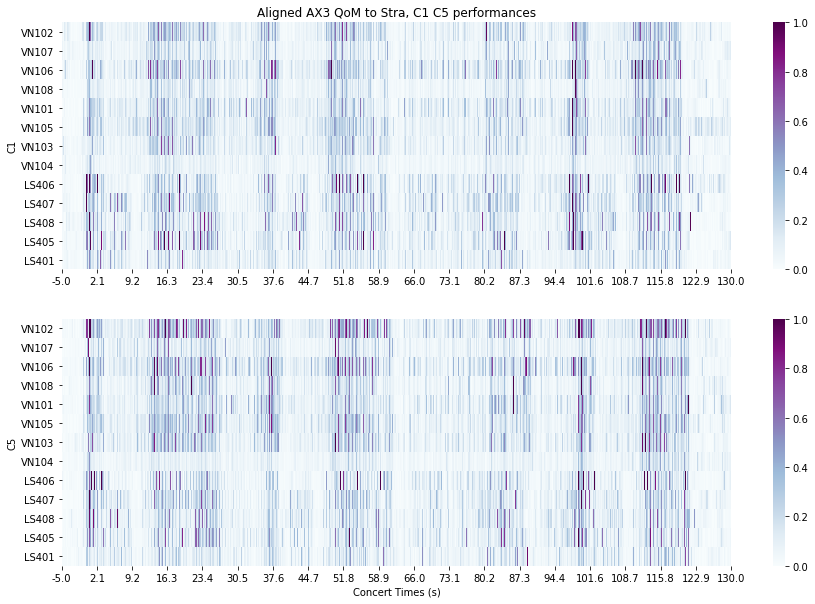

In [81]:
concerts = list(Performances.keys())
fig, (ax) = plt.subplots(len(concerts), 1,figsize = [15,10])
for i in range(len(concerts)):
    concert = concerts[i]
    df_sig = Performances[concert].copy()
    times = df_sig.index
    num_ticks = 20
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]

    chart = sns.heatmap(data=df_sig.transpose(), ax=ax[i],vmin=0, vmax=1,cmap="BuPu")
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels,rotation = 0)
    ax[i].set_ylabel(concert)
    if i == 0:
        ax[i].set_title('Aligned AX3 ' +  sigName + ' to ' + piece_name + ', C1 C5 performances')

ax[i].set_xlabel('Concert Times (s)')
plt.savefig('./plots/2_performances_ax3_'+ piece_name+ '_set_'+sigName+'.png',dpi = 300)
plt.show()


<AxesSubplot:>

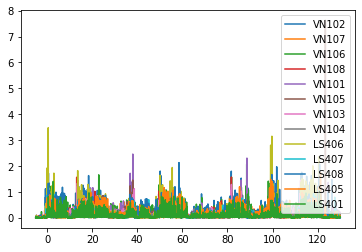

In [82]:
df_sig.plot()

 # Normalise measurements 
 to make the graphs more interpretable, compensate for distribution differences in sensor measurements to bring comparable signal information into focus
 
Steps per signal : 
 1. check distributions per measurement time series
 2. identify distribution parameters that identify equatible aspects of signal information
 3. Rescale measurements and compare distributions resulting.

## Accelerometer measures

AX3 first

From the Strauss excerpt, it seems that the second dimension of acceleration has the largest values, suggesting this is approximately the axis of bowing (devices positioned consistently in line with the bones of the forearm.

Or combined 2 and 3, for the displacement within the plane of bowing?

In [85]:
def stats_ts(df):
    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])
    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    
    return stats_df

In [305]:
ax_player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104',
                   'LS406','LS407','LS408','LS405','LS401']
datafile_type = 'AX3ACC'
concert = 'C2'
data_loc = '../Data/AlignedAX3/20230216_C2/Pieces/Stra/'+datafile_type+'/'
sigName = 'QoM'
sf = 50 # hz 
files = os.listdir(data_loc)
files.sort()
sig_files = {}
for f in files: 
    if f.endswith(datafile_type+'.csv'): 
        partID = f.split('_')[2]
        sig_files[partID] = data_loc+f

s_time = -15 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
e_time =  135 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
dur = e_time - s_time
time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
df_sig = pd.DataFrame(index = time_s,columns = ax_player_order,dtype='float')

for partID in sig_files.keys():
    V = pd.read_csv(sig_files[partID])
    sig_t = V['p_sTime']
    #sig_v = np.sqrt(np.square(V.loc[:,['2','3']].diff()).sum(axis=1)) #
    sig_v = (np.sqrt(np.square(V.loc[:,['1','2','3']]).sum(axis=1))-1)*9.8 # m/s^2 # does gravity need adjustment for individual devices?
    #sig_v = ((1/sf)*(np.sqrt(np.square(V.loc[:,['1','2','3']]).sum(axis=1))-1)*9.818).cumsum() # m/s
   # sig_v = sp.signal.detrend(((1/sf)*(np.sqrt(np.square(V.loc[:,['1','2','3']]).sum(axis=1))-1)*9.818).cumsum()) # m/s

    # normaliseation by mean
    sig_v = sig_v/sig_v.abs().mean()
    f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
    new_sig = f(time_s)
    df_sig.loc[:,partID] = new_sig
Scale_move = df_sig.copy()

(0.0, 0.5)

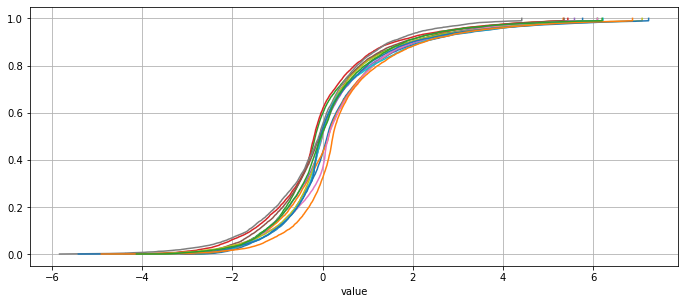

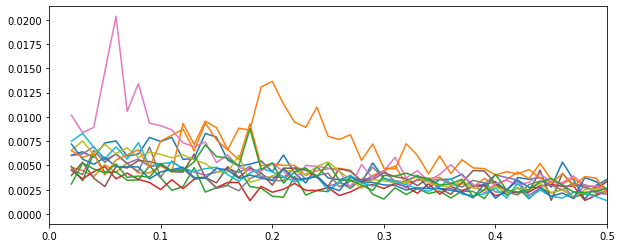

In [306]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
x_cdf = np.arange(0.01,5,0.01)
s = pd.Series(Scale_move.iloc[:,1], name = 'value')
df = pd.DataFrame(s)
cdfs_df = pd.DataFrame(index =x_cdf)
stats_df = stats_ts(df)
f = interpolate.interp1d(stats_df['cdf'], stats_df['value'],fill_value='extrapolate')

for c in Scale_move.columns:
    s = pd.Series(Scale_move[c], name = 'value')
    df = pd.DataFrame(s)
    thr = df['value'].quantile(q=.99)
    df.loc[df['value']>thr,'value']= thr
    stats_df = stats_ts(df)
    f = interpolate.interp1d(stats_df['value'], stats_df['cdf'],bounds_error=False)
    cdfs_df[c] = f(x_cdf)
    
    # Plot
    stats_df.plot(x = 'value', y = 'cdf',label = c, grid = True,ax=ax,legend = False)
    
cdfs_df.diff().plot(legend=False,figsize=[10,4])
plt.xlim([0,0.5])

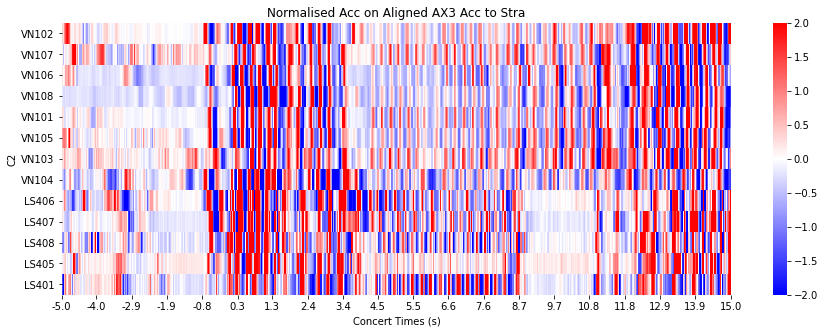

In [307]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_move.loc[-5:15,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-2, vmax=2,cmap="bwr")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Normalised Acc on Aligned AX3 Acc to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

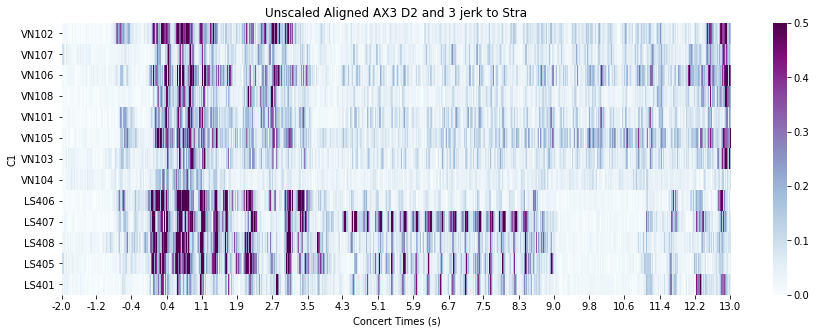

In [207]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_move.loc[-2:13,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=0, vmax=0.5,cmap="BuPu")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Unscaled Aligned AX3 D2 and 3 jerk to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

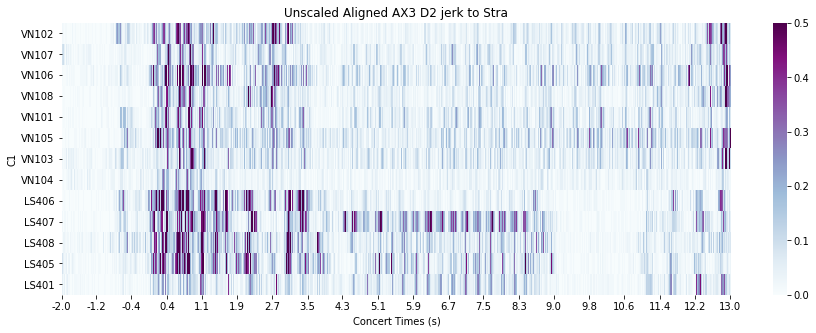

In [186]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_move.loc[-2:13,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=0, vmax=0.5,cmap="BuPu")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Unscaled Aligned AX3 D2 jerk to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

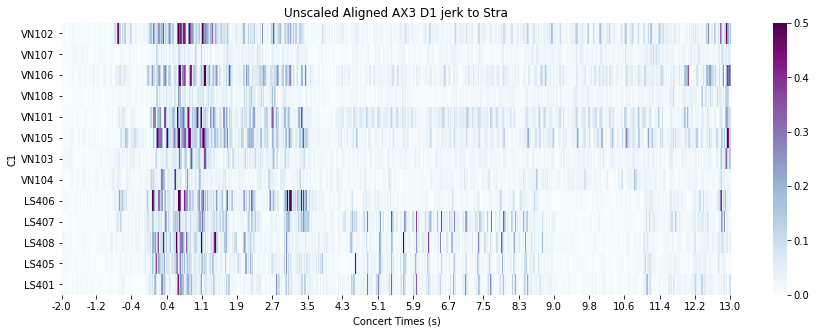

In [176]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_move.loc[-2:13,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=0, vmax=0.5,cmap="BuPu")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Unscaled Aligned AX3 D1 jerk to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

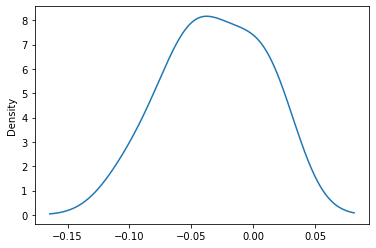

In [248]:
df_seg.median().plot.kde()

matched_median = df_seg.abs().median().median()
meds = df_seg.abs().median()
Scale_move = df_seg.copy() 

Scale_moved = Scale_move.copy()
for c in Scale_moved.columns:
    Scale_moved.loc[:,c] = matched_median*Scale_move[c]/meds[c]

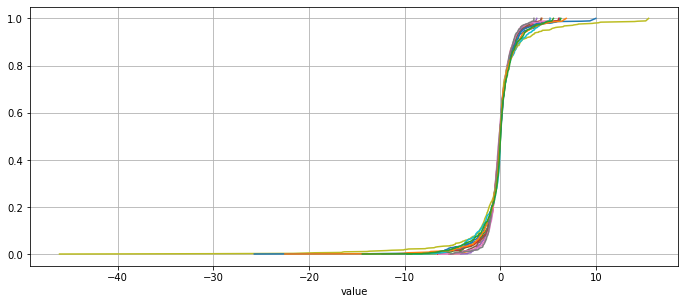

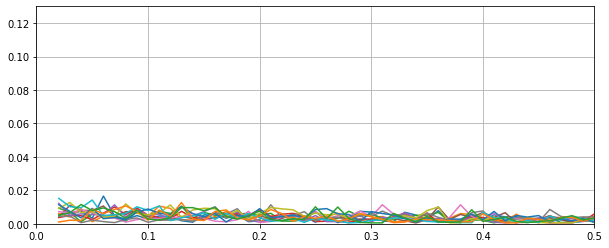

In [249]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
x_cdf = np.arange(0.01,5,0.01)
s = pd.Series(Scale_moved.iloc[:,1], name = 'value')
df = pd.DataFrame(s)
cdfs_df = pd.DataFrame(index =x_cdf)
stats_df = stats_ts(df)
f = interpolate.interp1d(stats_df['cdf'], stats_df['value'],fill_value='extrapolate')

for c in Scale_moved.columns:
    s = pd.Series(Scale_moved[c], name = 'value')
    df = pd.DataFrame(s)
    thr = df['value'].quantile(q=.99)
    df.loc[df['value']>thr,'value']= thr
    stats_df = stats_ts(df)
    f = interpolate.interp1d(stats_df['value'], stats_df['cdf'],bounds_error=False)
    cdfs_df[c] = f(x_cdf)
    
    # Plot
    stats_df.plot(x = 'value', y = 'cdf',label = c, grid = True,ax=ax,legend = False)
    
cdfs_df.diff().plot(legend=False,figsize=[10,4])
plt.xlim([0,0.5])
plt.ylim([0,0.13])
plt.grid()

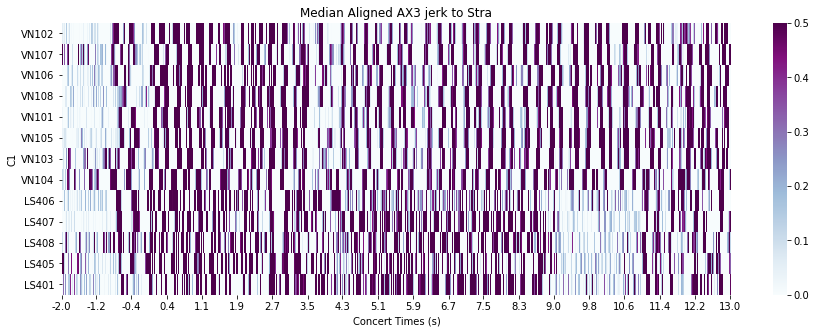

In [250]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_moved.loc[-2:13,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=0, vmax=0.5,cmap="BuPu")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Median Aligned AX3 jerk to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

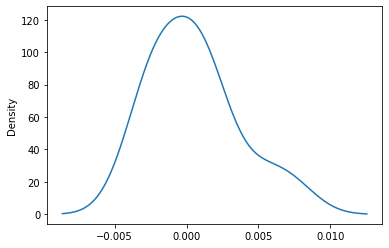

In [251]:
df_seg.mean().plot.kde()

matched_mean = df_seg.abs().mean().mean()
meds = df_seg.abs().mean()
Scale_move = df_seg.copy() 

Scale_moved = Scale_move.copy()
for c in Scale_moved.columns:
    Scale_moved.loc[:,c] = matched_mean*Scale_move[c]/meds[c]

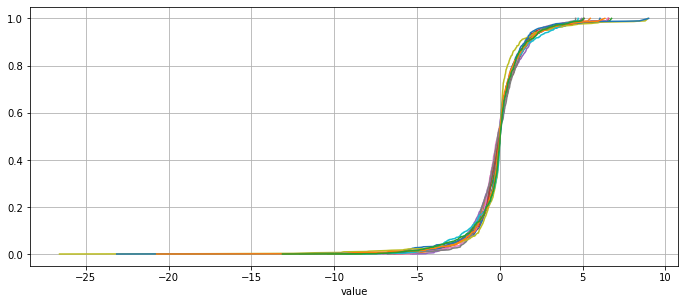

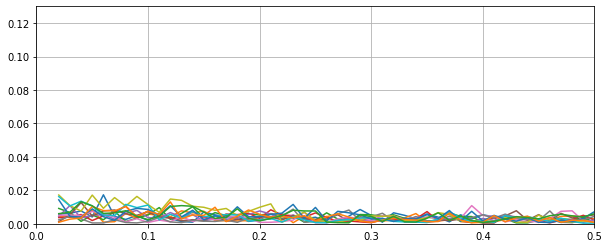

In [252]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
x_cdf = np.arange(0.01,5,0.01)
s = pd.Series(Scale_moved.iloc[:,1], name = 'value')
df = pd.DataFrame(s)
cdfs_df = pd.DataFrame(index =x_cdf)
stats_df = stats_ts(df)
f = interpolate.interp1d(stats_df['cdf'], stats_df['value'],fill_value='extrapolate')

for c in Scale_moved.columns:
    s = pd.Series(Scale_moved[c], name = 'value')
    df = pd.DataFrame(s)
    thr = df['value'].quantile(q=.99)
    df.loc[df['value']>thr,'value']= thr
    stats_df = stats_ts(df)
    f = interpolate.interp1d(stats_df['value'], stats_df['cdf'],bounds_error=False)
    cdfs_df[c] = f(x_cdf)
    
    # Plot
    stats_df.plot(x = 'value', y = 'cdf',label = c, grid = True,ax=ax,legend = False)
    
cdfs_df.diff().plot(legend=False,figsize=[10,4])
plt.xlim([0,0.5])
plt.ylim([0,0.13])
plt.grid()

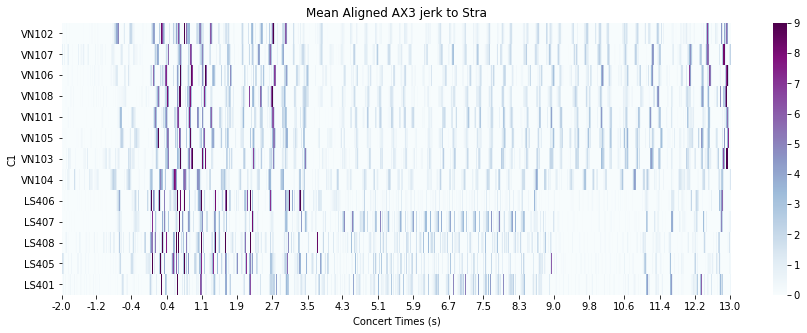

In [257]:
fig, (ax) = plt.subplots(1, 1,figsize = [15,5])

df_seg = Scale_moved.loc[-2:13,:].copy()
times = df_seg.index
num_ticks = 20
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=0, vmax=9,cmap="BuPu")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_ylabel(concert)
ax.set_title('Mean Aligned AX3 jerk to ' + piece_name)
ax.set_xlabel('Concert Times (s)')
plt.show()

<AxesSubplot:>

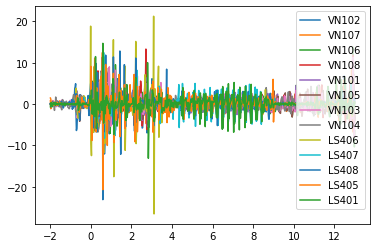

In [258]:
Scale_moved.plot()

(0.0, 10.0)

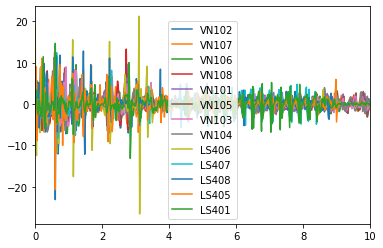

In [315]:
Scale_moved.plot()
plt.xlim([0,10])

In [320]:
time_start = Scale_moved.index[0]
time_end = Scale_moved.index[-1]
print([time_start,time_end])

ax1.set_xlim([time_start,time_end])

[-2.0, 13.0]


<AxesSubplot:>

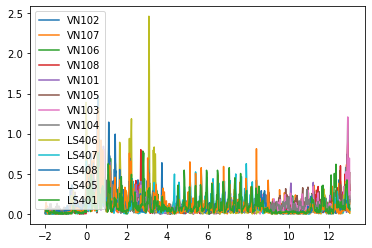

In [214]:
Scale_moved.plot()

<AxesSubplot:>

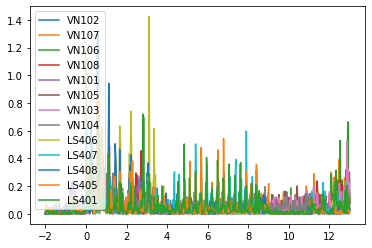

In [203]:
Scale_moved.plot()

<AxesSubplot:>

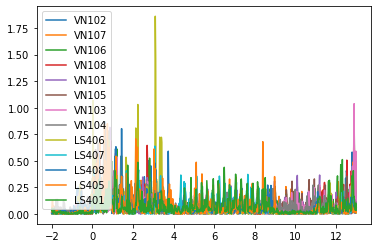

In [193]:
Scale_moved.plot()

# Trial gif

In [344]:
ax_player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104','gap',
                   'LS406','LS407','LS408','LS405','LS401']

datafile_type = 'AX3ACC'
concert = 'C1'
data_loc = '../Data/AlignedAX3/20230216_C1/Pieces/Stra/'+datafile_type+'/'
sigName = 'QoM'
sf = 50 # hz 
files = os.listdir(data_loc)
files.sort()
sig_files = {}
for f in files: 
    if f.endswith(datafile_type+'.csv'): 
        partID = f.split('_')[2]
        sig_files[partID] = data_loc+f

s_time = -15 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
e_time =  135 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
dur = e_time - s_time
time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
df_sig = pd.DataFrame(index = time_s,columns = ax_player_order,dtype='float')

for partID in sig_files.keys():
    V = pd.read_csv(sig_files[partID])
    sig_t = V['p_sTime']
    sig_v = (np.sqrt(np.square(V.loc[:,['1','2','3']]).sum(axis=1))-1)*9.8 # m/s^2 # does gravity need adjustment for individual devices?
    # normaliseation by mean
    #sig_v = sig_v/sig_v.abs().mean()
    f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
    new_sig = f(time_s)
    df_sig.loc[:,partID] = new_sig

In [ ]:
# work out an order that is legible despite offsets

In [352]:
df_sig.loc[:,['VN107','VN104','VN102','VN101','VN105','VN103','VN108','VN106',]].corr()

,VN107,VN104,VN102,VN101,VN105,VN103,VN108,VN106
VN107,1.000000,0.550056,0.553770,0.358729,0.360601,0.324035,0.433347,0.228667
VN104,0.550056,1.000000,0.547328,0.283919,0.263409,0.231113,0.258537,0.123146
VN102,0.553770,0.547328,1.000000,0.551108,0.484469,0.524511,0.561585,0.437832
VN101,0.358729,0.283919,0.551108,1.000000,0.686667,0.660585,0.622548,0.630121
VN105,0.360601,0.263409,0.484469,0.686667,1.000000,0.716657,0.629693,0.690714
VN103,0.324035,0.231113,0.524511,0.660585,0.716657,1.000000,0.655187,0.651211
VN108,0.433347,0.258537,0.561585,0.622548,0.629693,0.655187,1.000000,0.584598
VN106,0.228667,0.123146,0.437832,0.630121,0.690714,0.651211,0.584598,1.000000


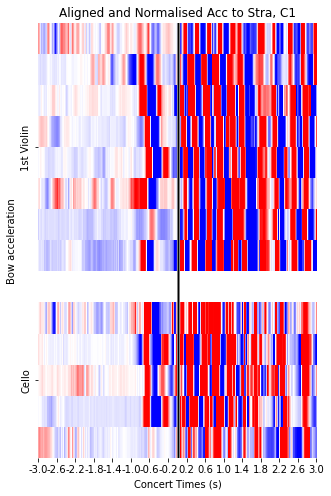

In [358]:
fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
alt_ord = ['VN107','VN104','VN102','VN101','VN105','VN103','VN108','VN106', #'VN104','VN102','VN103','VN107','VN101','VN105','VN106','VN108',
           'gap','LS408','LS406','LS405','LS407','LS401']
frame_time = 0
time_range = 3
df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,alt_ord].copy()
times = df_seg.index
num_ticks = 16
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-3, vmax=3,cmap="bwr",cbar = False)
ax.plot(np.array([1, 1])*len(times)/2,[0,15],'grey',linewidth=3)
ax.plot(np.array([1, 1])*len(times)/2,[0,15],'k',linewidth=1)
ax.set_yticks([4, 11.5])
ax.set_yticklabels(['1st Violin','Cello'],rotation = 90,va='center')
ax.set_ylabel('Bow acceleration')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_title('Aligned and Normalised Acc to ' + piece_name + ', ' + concert)
ax.set_xlabel('Concert Times (s)')
plt.show()

In [359]:
import imageio

pd.options.mode.chained_assignment = None

from matplotlib import colors
from scipy.spatial.distance import pdist, squareform
import moviepy.editor as mp
from pydub import AudioSegment
from pydub.playback import play
from pygifsicle import optimize

https://imageio.readthedocs.io/en/stable/

In [400]:
filenames = []
time_range = 5
alt_ord = ['VN107','VN104','VN102','VN101','VN105','VN103','VN108','VN106', #'VN104','VN102','VN103','VN107','VN101','VN105','VN106','VN108',
           'gap','LS408','LS406','LS405','LS407','LS401']

slice_i = 0
frame_time = 0
time_hop = 0.04
t_max = 25
time_steps = np.linspace(time_hop,t_max,int(t_max/time_hop))

fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,alt_ord].copy()
times = df_seg.index
num_ticks = 16
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-3, vmax=3,cmap="bwr",cbar = False)
ax.plot(np.array([1, 1])*len(times)/2,[0,15],'grey',linewidth=3)
ax.plot(np.array([1, 1])*len(times)/2,[0,15],'k',linewidth=1)
ax.set_yticks([4, 11.5])
ax.set_yticklabels(['1st Violin','Cello'],rotation = 90,va='center')
ax.set_ylabel('Bow acceleration')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_title('Aligned and Normalised Acc to ' + piece_name + ', ' + concert)
ax.set_xlabel('Concert Times (s)')

filename = f'{slice_i}.png'
filenames.append(filename)
# save frame
plt.savefig(filename,bbox_inches = 'tight',dpi=200)
plt.close()

for slice_i in range(1,len(time_steps)):
    frame_time = time_steps[slice_i]
    fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
    df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,alt_ord].copy()
    times = df_seg.index
    num_ticks = 16
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]
    chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-3, vmax=3,cmap="bwr",cbar = False)
    ax.plot(np.array([1, 1])*len(times)/2,[0,15],'grey',linewidth=3)
    ax.plot(np.array([1, 1])*len(times)/2,[0,15],'k',linewidth=1)
    ax.set_yticks([4, 11.5])
    ax.set_yticklabels(['1st Violin','Cello'],rotation = 90,va='center')
    ax.set_ylabel('Bow acceleration')

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels,rotation = 0)
    ax.set_title('Aligned and Normalised Acc to ' + piece_name + ', ' + concert)
    ax.set_xlabel('Concert Times (s)')
    filename = f'{slice_i}.png'
    filenames.append(filename)
    # save frame
    plt.savefig(filename,bbox_inches = 'tight',dpi=200)
    plt.close()

In [401]:
gif_path = './plots/Bowing_test.gif'
with imageio.get_writer(gif_path, mode='I',fps=25) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
optimize('./plots/Bowing_test.gif', "optimized_Bowing_test.gif") # For creating a new one

In [405]:
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [403]:
outfile = "optimized_Bowing_test.gif"#'./plots/Bowing_test.gif'
clip = mp.VideoFileClip(outfile)
clip.write_videofile("myvideo.mp4")

t:   2%|▏         | 11/625 [00:00<00:05, 104.58it/s, now=None]

Moviepy - Building video myvideo.mp4.
Moviepy - Writing video myvideo.mp4



Moviepy - Done !
Moviepy - video ready myvideo.mp4


In [404]:
audio = mp.AudioFileClip("../Data/misc/Stra_start_C1.mp3")
video1 = mp.VideoFileClip('myvideo.mp4')
final = video1.set_audio(audio)

final.write_videofile("output.mp4")

chunk:  20%|██        | 113/553 [00:00<00:00, 1127.89it/s, now=None]

Moviepy - Building video output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp3


t:   2%|▏         | 13/625 [00:00<00:05, 121.73it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


# Resp gif

In [1]:
player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104','',
                'VN205','VN203','VN202','VN206','VN209','VN210','VN207','VN208','VN201','VN204','',
                'VA305','VA307','VA308','VA301','VA306','VA302','VA303','VA304','',
                'LS406','LS407','LS408','LS405','LS401','LS403','LS402','LS410','LS404','',
                'WW505','WW502','WW503','WW506','WW501','WW504','WW507','',
                'BR604','BR603','BR602','BR606','BR607','BR605','BR601','',
                'PC704','PC705','PC703','PC701','PC702','','PC707']

In [435]:
datafile_type = 'EQRESP'
concert = 'C1'
data_loc = '../Data/AlignedEQ/20230216_C1/Pieces/Stra/'+datafile_type+'/'
sigName = 'Breathing'
sf = 25 # hz 
files = os.listdir(data_loc)
files.sort()
sig_files = {}
for f in files: 
    if f.endswith(datafile_type+'.csv'): 
        partID = f.split('_')[2]
        sig_files[partID] = data_loc+f

s_time = -15 #Piece_timings.loc[31,concert]-5 -Piece_timings.loc[31,concert]
e_time =  135 #Piece_timings.loc[32,concert]+5 -Piece_timings.loc[31,concert]
dur = e_time - s_time
time_s = s_time +  np.round(np.linspace(0,dur,int(sf*(dur)),endpoint=False),3)
df_sig = pd.DataFrame(index = time_s,columns = player_order,dtype='float')

for partID in sig_files.keys():
    V = pd.read_csv(sig_files[partID])
    sig_t = V['p_sTime']
    sig_v = V[sigName].diff()
    sig_v = sig_v/sig_v.abs().median()
    f = interpolate.interp1d(sig_t, sig_v,fill_value='extrapolate')
    new_sig = f(time_s)
    df_sig.loc[:,partID] = new_sig

<AxesSubplot:>

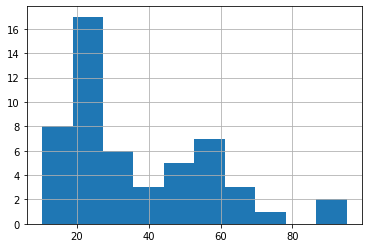

In [436]:
(df_sig.max()-df_sig.min()).hist()

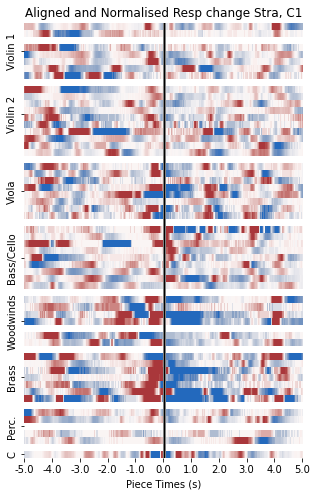

In [448]:
fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
# alt_ord = ['VN107','VN104','VN102','VN101','VN105','VN103','VN108','VN106', #'VN104','VN102','VN103','VN107','VN101','VN105','VN106','VN108',
#            'gap','LS408','LS406','LS405','LS407','LS401']
frame_time = 0
time_range = 5
df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,:].copy()
times = df_seg.index
num_ticks = 11
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-5, vmax=5,cmap="vlag",cbar = False)#,)
ax.plot(np.array([1, 1])*len(times)/2,[0,62],'grey',linewidth=3)
ax.plot(np.array([1, 1])*len(times)/2,[0,62],'k',linewidth=1)
ax.set_yticks([4,13,24,33.5,42.5,50.5,57.5,61.5])
ax.set_yticklabels(['Violin 1','Violin 2','Viola','Bass/Cello','Woodwinds','Brass','Perc.','C'],rotation = 90,va='center')
# ax.set_ylabel('Bow acceleration')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_title('Aligned and Normalised Resp change ' + piece_name + ', ' + concert)
ax.set_xlabel('Piece Time (s)')
plt.show()

In [453]:
filenames = []
time_range = 5

slice_i = 0
frame_time = 0
time_hop = 0.04
t_max = 25
time_steps = np.linspace(time_hop,t_max,int(t_max/time_hop))

fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,:].copy()
times = df_seg.index
num_ticks = 11
xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
xticklabels = [np.round(times[idx],1) for idx in xticks]
chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-5, vmax=5,cmap="vlag",cbar = False)#,)
ax.plot(np.array([1, 1])*len(times)/2,[0,62],'grey',linewidth=3)
ax.plot(np.array([1, 1])*len(times)/2,[0,62],'k',linewidth=1)
ax.set_yticks([4,13,24,33.5,42.5,50.5,57.5,61.5])
ax.set_yticklabels(['Violin 1','Violin 2','Viola','Bass/Cello','Woodwinds','Brass','Perc.','C'],rotation = 90,va='center')
ax.set_ylabel('Inspiration/Expiration')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation = 0)
ax.set_title('Aligned and Normalised Resp change ' + piece_name + ', ' + concert)
ax.set_xlabel('Piece Time (s)')

filename = f'{slice_i}.png'
filenames.append(filename)
# save frame
plt.savefig(filename,bbox_inches = 'tight',dpi=200)
plt.close()

for slice_i in range(1,len(time_steps)):
    frame_time = time_steps[slice_i]
    fig, (ax) = plt.subplots(1, 1,figsize = [5,8])
    df_seg = df_sig.loc[frame_time-time_range:frame_time+time_range,:].copy()
    times = df_seg.index
    num_ticks = 11
    xticks = np.linspace(0, len(times) - 1, num_ticks, dtype='int')
    xticklabels = [np.round(times[idx],1) for idx in xticks]
    chart = sns.heatmap(data=df_seg.transpose(), ax=ax,vmin=-5, vmax=5,cmap="vlag",cbar = False)#,)
    ax.plot(np.array([1, 1])*len(times)/2,[0,62],'grey',linewidth=3)
    ax.plot(np.array([1, 1])*len(times)/2,[0,62],'k',linewidth=1)
    ax.set_yticks([4,13,24,33.5,42.5,50.5,57.5,61.5])
    ax.set_yticklabels(['Violin 1','Violin 2','Viola','Bass/Cello','Woodwinds','Brass','Perc.','C'],rotation = 90,va='center')
    ax.set_ylabel('Inspiration/Expiration')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels,rotation = 0)
    ax.set_title('Aligned and Normalised Resp change ' + piece_name + ', ' + concert)
    ax.set_xlabel('Piece Time (s)')
    
    filename = f'{slice_i}.png'
    filenames.append(filename)
    # save frame
    plt.savefig(filename,bbox_inches = 'tight',dpi=200)
    plt.close()

In [454]:
gif_path = './plots/Resp_test.gif'
with imageio.get_writer(gif_path, mode='I',fps=25) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
optimize('./plots/Resp_test.gif', "optimized_Resp_test.gif") # For creating a new one

In [455]:
outfile = "optimized_Resp_test.gif"#'./plots/Bowing_test.gif'
clip = mp.VideoFileClip(outfile)
clip.write_videofile("respStravideo.mp4")

t:   2%|▏         | 14/625 [00:00<00:04, 132.75it/s, now=None]

Moviepy - Building video respStravideo.mp4.
Moviepy - Writing video respStravideo.mp4



Moviepy - Done !
Moviepy - video ready respStravideo.mp4


In [456]:
audio = mp.AudioFileClip("../Data/misc/Stra_start_C1.mp3")
video1 = mp.VideoFileClip("respStravideo.mp4")
final = video1.set_audio(audio)

final.write_videofile("Resp_output.mp4")

chunk:  20%|█▉        | 109/553 [00:00<00:00, 1089.90it/s, now=None]

Moviepy - Building video Resp_output.mp4.
MoviePy - Writing audio in Resp_outputTEMP_MPY_wvf_snd.mp3


t:   2%|▏         | 12/625 [00:00<00:05, 114.90it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video Resp_output.mp4



Moviepy - Done !
Moviepy - video ready Resp_output.mp4


In [457]:
# Remove files
for filename in set(filenames):
    os.remove(filename)